Problem Statement:


An ecommerce company has prepared a rough dataset containing shopping details of their customers, which includes CustomerID, Genre,
Age, Annual Income (k$), Spending Score (1-100). The company is unable to target a specific set of customers with a particular set of SKUs.

Objective:
Segment customers into different groups based on their shopping trends.

# Hierarchical clustering

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [39]:
df = pd.read_csv("/content/drive/My Drive/ML_DATASETS/datasets/LVC Datasets/Lesson 5/Dataset/shopping_data.csv")


In [40]:
df.rename(columns={'Genre':'Gender'},  inplace=True)

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.shape

(200, 5)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
data = df.iloc[:,3:5].values
print(type(data))

<class 'numpy.ndarray'>


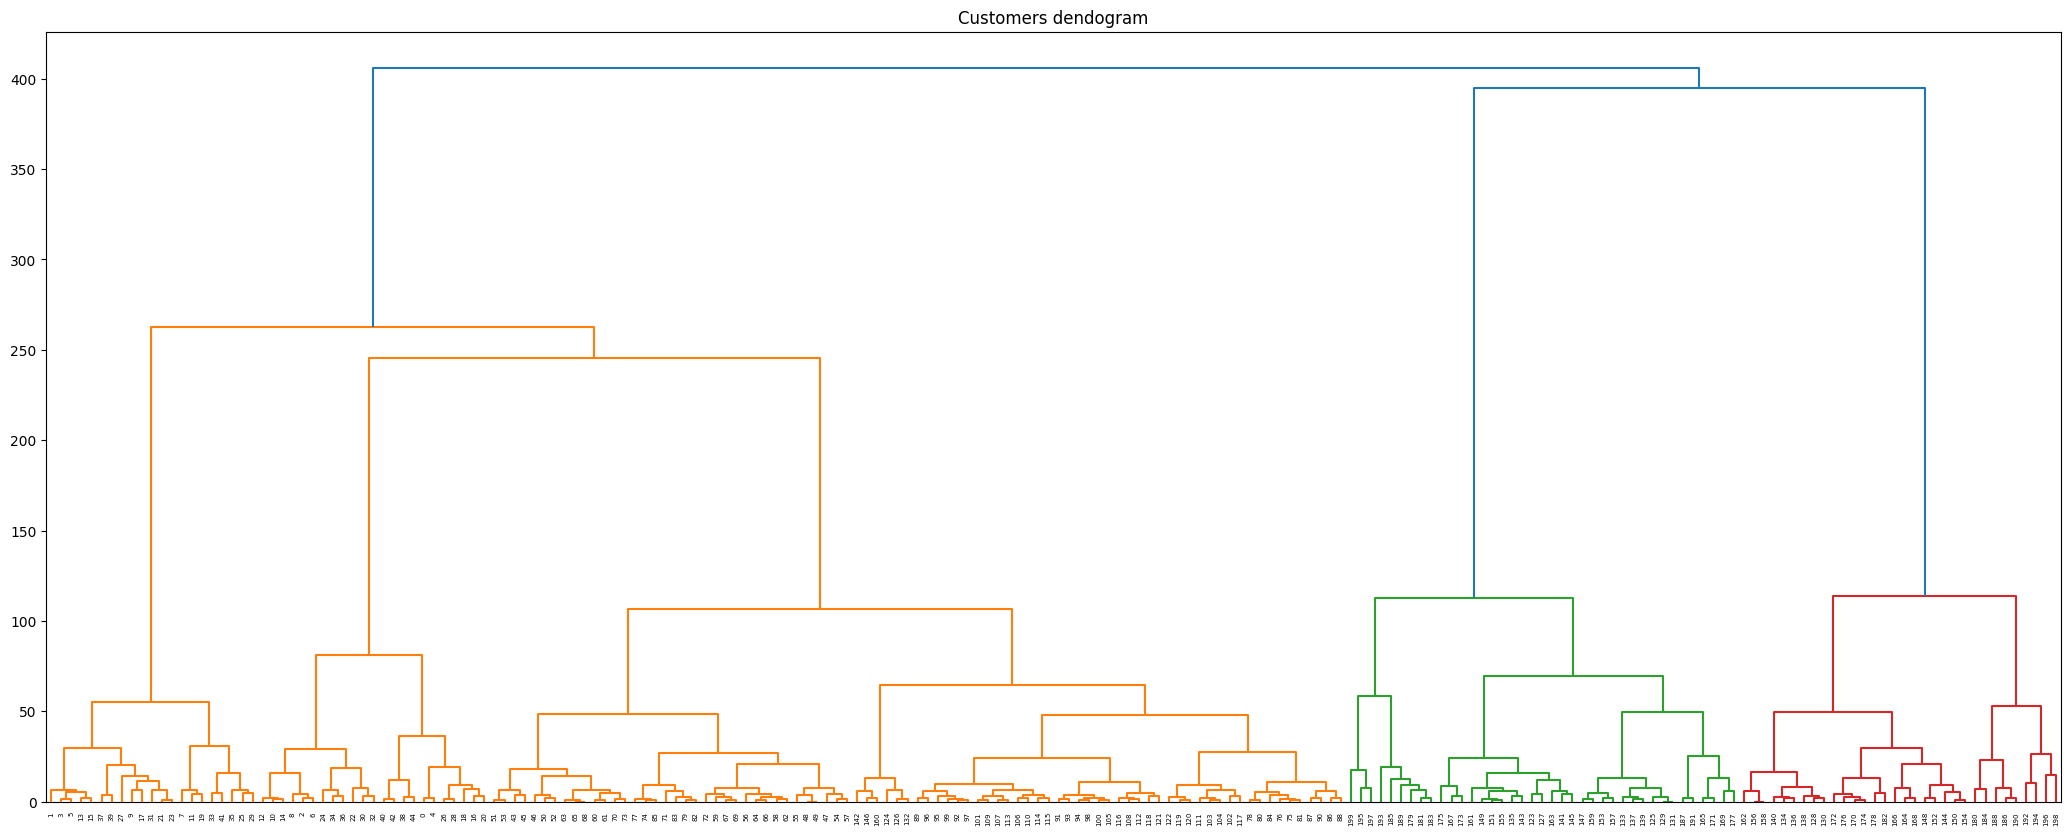

In [45]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(26,10))
plt.title("Customers dendogram")
dend = shc.dendrogram(shc.linkage(data,method='ward'))

In [46]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

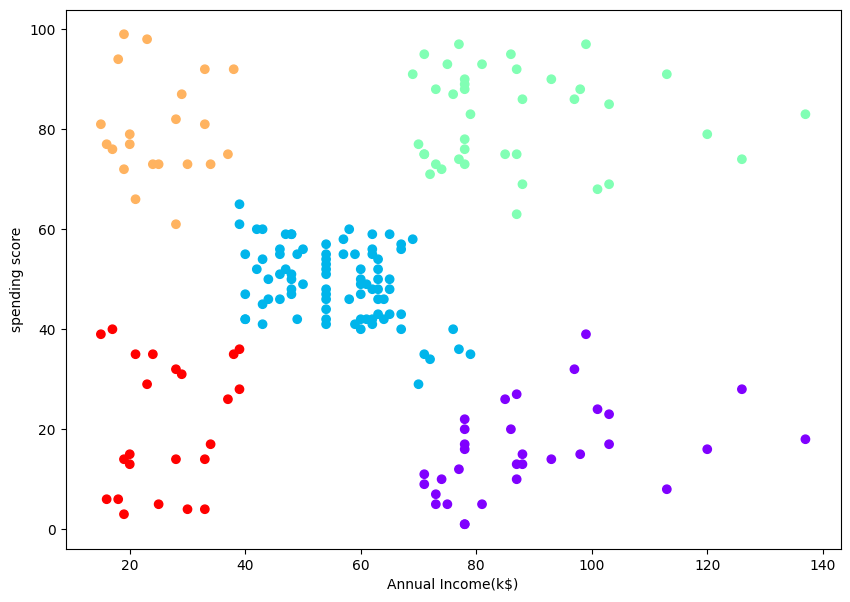

In [47]:
plt.figure(figsize=(10, 7))
plt.xlabel("Annual Income(k$)")
plt.ylabel("spending score")
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')


# KMeans Clustering

Using KMeans clustering


In [66]:
df = pd.read_csv("/content/drive/My Drive/ML_DATASETS/datasets/LVC Datasets/Lesson 5/Dataset/shopping_data.csv")


In [67]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
from sklearn.cluster import KMeans

Decide the optimal no.of clusters

In [69]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df.drop(columns=['CustomerID','Genre','Age'],axis=1))
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

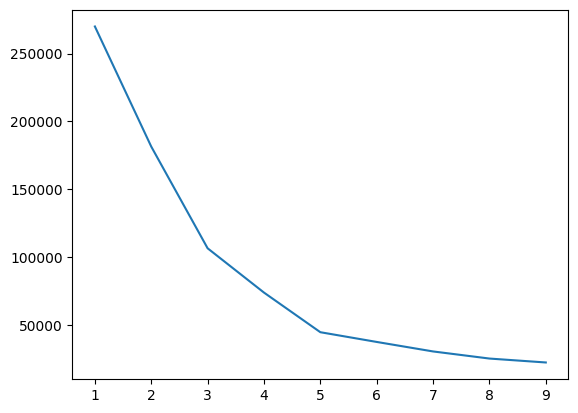

In [70]:
plt.plot(k_rng,sse)

In [71]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df.drop(columns=['CustomerID','Genre','Age'],axis=1))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [72]:
a= kmeans.labels_

In [73]:
df['cluster'] =a

In [74]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


Text(0.5, 1.0, 'Befor clustering')

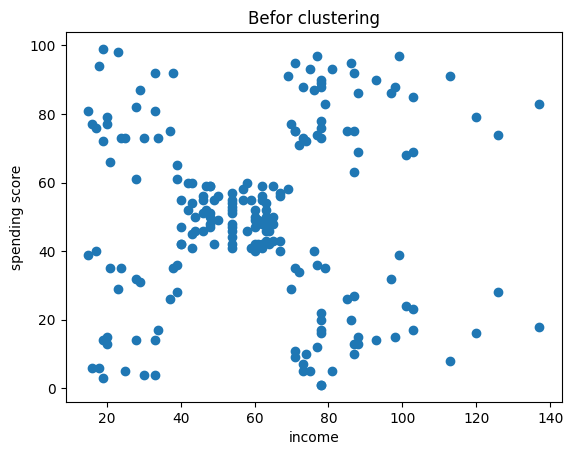

In [75]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel("income")
plt.ylabel("spending score")
plt.title("Befor clustering")

Text(0.5, 1.0, 'After clustering')

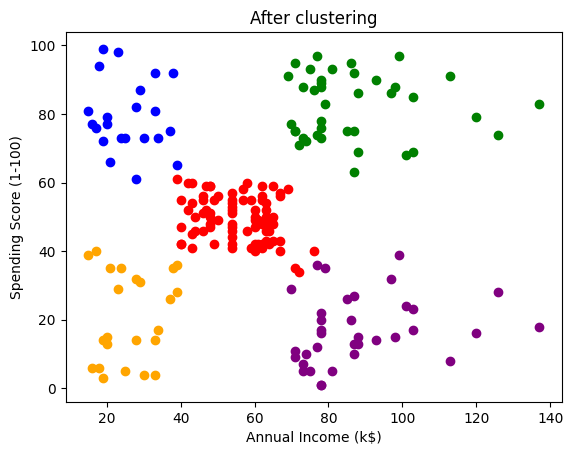

In [77]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
df4 = df[df['cluster']==3]
df5 = df[df['cluster']==4]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='green')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='orange')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='purple')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("After clustering")


